In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Read admission data 
df = pd.read_csv('../data/admissions.csv')
print(df.shape)
print()
print(df.columns)
print()
print(df.describe())



(400, 4)

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


![admissions dictionary](../img/admissions-dictionary.png)

# Correlation matrix

In [101]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


# Correlation between GRE and GPA

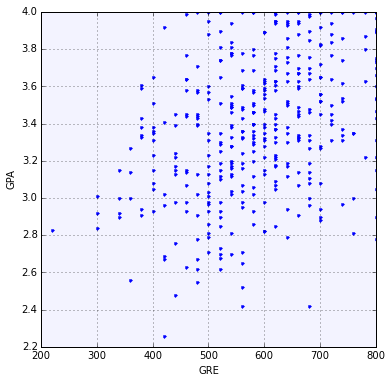

In [102]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df.gre, df.gpa, '.')
plt.xlabel('GRE')
plt.ylabel('GPA')
plt.grid()

# Linear regression model


first normalize the data


In [103]:
df.gre = (df.gre-min(df.gre))/(max(df.gre)-min(df.gre))
df.gpa = (df.gpa-min(df.gpa))/(max(df.gpa)-min(df.gpa))
print(df.describe())

            admit         gre         gpa    prestige
count  400.000000  398.000000  398.000000  399.000000
mean     0.317500    0.634552    0.649960    2.486216
std      0.466087    0.199360    0.218753    0.945333
min      0.000000    0.000000    0.000000    1.000000
25%      0.000000    0.517241    0.500000    2.000000
50%      0.000000    0.620690    0.652299    2.000000
75%      1.000000    0.758621    0.810345    3.000000
max      1.000000    1.000000    1.000000    4.000000


### Instantiate the model: 

> lm = smf.ols(formula='gpa ~ gre', data=df)

where **gpa ~ gre** indicates you want **gpa** as a function of **gre**

and calculate the coefficients

> lm = lm.fit()

Which can be written in one line

> lm = smf.ols(formula='gpa ~ gre', data=df).fit()




In [104]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='gpa ~ gre', data=df).fit()
print(lm.summary())
slope = lm.params[0]
intercept = lm.params[1]
print("slope: %s "% slope)
print("intercept: %s "% intercept)

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           2.84e-15
Time:                        19:00:57   Log-Likelihood:                 72.371
No. Observations:                 397   AIC:                            -140.7
Df Residuals:                     395   BIC:                            -132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3851      0.034     11.376      0.0

# R-squared and Adj. R-squared

https://en.wikipedia.org/wiki/Coefficient_of_determination

"Linear regression: $R^2$ is simply the square of the sample correlation coefficient between the outcomes and their predicted values"

The more you add variables => the higher $R^2$ gets!

Thus Adj. $R^{2}$. Correction for complexity


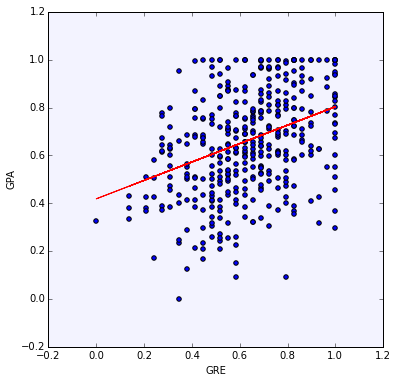

In [105]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df.gre, df.gpa)
ax.plot(df.gre,  slope * df.gre +intercept, color='red')
plt.xlabel('GRE')
plt.ylabel('GPA')


# Anscombe's quartet 
https://en.wikipedia.org/wiki/Anscombe%27s_quartet

![Anscombe's quartet ](../img/Anscombe_quartet_3.svg)


# Multi linear regression
Use gre, gpa  to predict admission

$$ admit = a * GRE + b * GPA + d $$


In [106]:
# Regression model
lm = smf.ols(formula='admit ~ gre  ', data=df).fit()
print("R-squared %0.4f Adj. R-squared %0.4f" % (lm.rsquared, lm.rsquared_adj) )

# Result
# print(lm.summary())

# Regression model
lm = smf.ols(formula='admit ~ gre + gpa ', data=df).fit()
print("R-squared %0.4f Adj. R-squared %0.4f" % (lm.rsquared, lm.rsquared_adj) )
# Result
# print(lm.summary())

# Regression model
lm = smf.ols(formula='admit ~ gre + gpa + prestige ', data=df).fit()
print("R-squared %0.4f Adj. R-squared %0.4f" % (lm.rsquared, lm.rsquared_adj) )
# Result
# print(lm.summary())

R-squared 0.0335 Adj. R-squared 0.0310
R-squared 0.0457 Adj. R-squared 0.0409
R-squared 0.0946 Adj. R-squared 0.0877


In [107]:
lm.params

Intercept    0.264989
gre          0.251882
gpa          0.254429
prestige    -0.109666
dtype: float64

$$
    admit = 0.25 * GRE + 0.25 * GPA  - 0.11 * Prestige + 0.26
$$

# Dummy encoding for prestige


In [110]:
df.prestige.value_counts(dropna=False)
df = df.dropna(subset=['prestige'])
print(df.shape)

pr = pd.get_dummies(df.prestige.astype(np.int), prefix='prestige')

# concat the 2 dataframes => new dataframe df_dummies
df_dummies = pd.concat((df, pr), axis=1)
# drop prestige
df_dummies = df_dummies.drop('prestige', axis = 1)
print(df_dummies.head())

(399, 4)
   admit       gre       gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  0.275862  0.775862           0           0           1           0
1      1  0.758621  0.810345           0           0           1           0
2      1  1.000000  1.000000           1           0           0           0
3      1  0.724138  0.534483           0           0           0           1
4      0  0.517241  0.385057           0           0           0           1


In [113]:
# regression
lm = smf.ols(formula='admit ~ gre + gpa + prestige_1 + prestige_2 + prestige_3 + prestige_4 ', data=df_dummies).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           9.71e-08
Time:                        19:02:25   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0010      0.070      0.014      0.989        -0.136     0.138
gre            0.2445      0.122      1.997      0.047         0.004     0.485
gpa            0.2624      0.112      2.349      0.019         0.043     0.482
prestige_1     0.1949      0.053      3.692      0.000         0.091     0.299
prestige_2     0.0313      0.038      0.818      0.414        -0.044     0.107
prestige_3    -0.0961      0.040     -2.374      0.018        -0.176    -0.017
prestige_4    -0.1291      0.048     -2.700      0.007        -0.223    -0.035
==============================================================================
Omnibus:                      152.312   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.314
Skew:                           0.678   Prob(JB):                     1.19e-11
Kurtosis:                       1.904   Cond. No.                     1.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""